<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/san_lr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo

In [3]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Загрузка датасета Wine Quality
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets
df = pd.concat([X, y], axis=1)
df['color'] = wine_quality.data.original['color']  # Добавляем тип вина (red/white)

# Вывод первых строк
print(df.head())

# Размер датасета
print(df.shape)  # Ожидаемо: (6497, 13) — 12 признаков + quality + color

# Информация о данных
df.info()

# Описательная статистика
print(df.describe())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

In [4]:
# Количество уникальных вин (если есть ID, но здесь нет — считаем по комбинациям признаков или просто строкам)
print(len(df))  # 6497 записей

# Уникальные типы вина
print(df['color'].value_counts())  # red: ~1599, white: ~4898

# Группировка по качеству
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)

6497
color
white    4898
red      1599
Name: count, dtype: int64
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


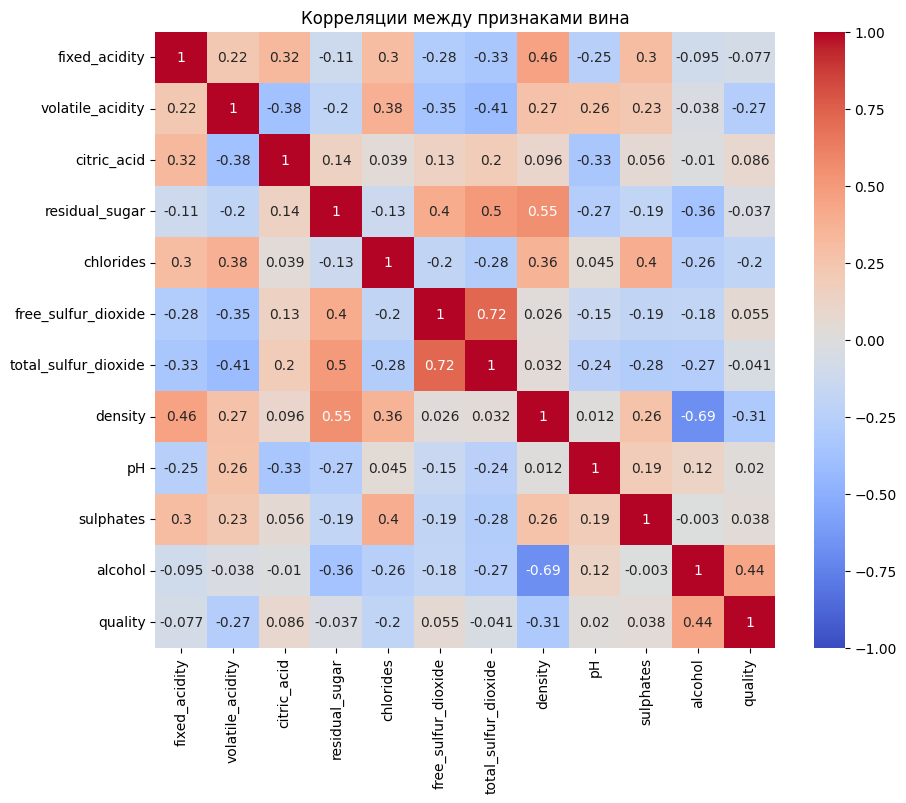

In [5]:
# Матрица корреляций (только числовые столбцы)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Корреляции между признаками вина')
plt.show()

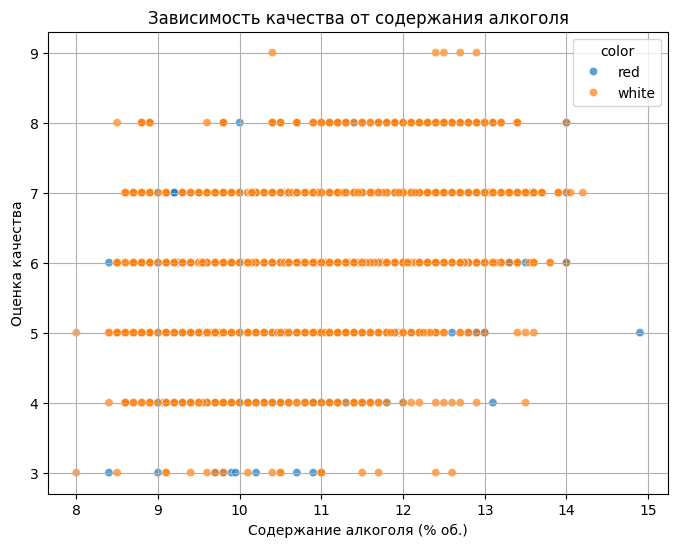

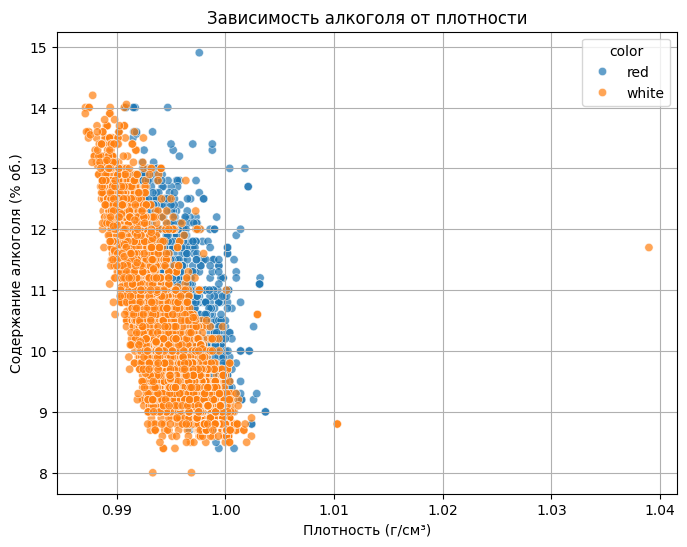

In [6]:
# Диаграмма рассеяния: alcohol vs quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', hue='color', alpha=0.7)
plt.title('Зависимость качества от содержания алкоголя')
plt.xlabel('Содержание алкоголя (% об.)')
plt.ylabel('Оценка качества')
plt.grid(True)
plt.show()

# Диаграмма рассеяния: density vs alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='density', y='alcohol', hue='color', alpha=0.7, color='green')
plt.title('Зависимость алкоголя от плотности')
plt.xlabel('Плотность (г/см³)')
plt.ylabel('Содержание алкоголя (% об.)')
plt.grid(True)
plt.show()

In [7]:
# Подсчёт частоты каждого уровня качества (аналогично подсчёту поездок)
quality_counts = df['quality'].value_counts()
print(quality_counts)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [8]:
# Описательная статистика частот (аналогично counts.describe())
print(quality_counts.describe())

count       7.000000
mean      928.142857
std      1142.575078
min         5.000000
25%       111.500000
50%       216.000000
75%      1608.500000
max      2836.000000
Name: count, dtype: float64


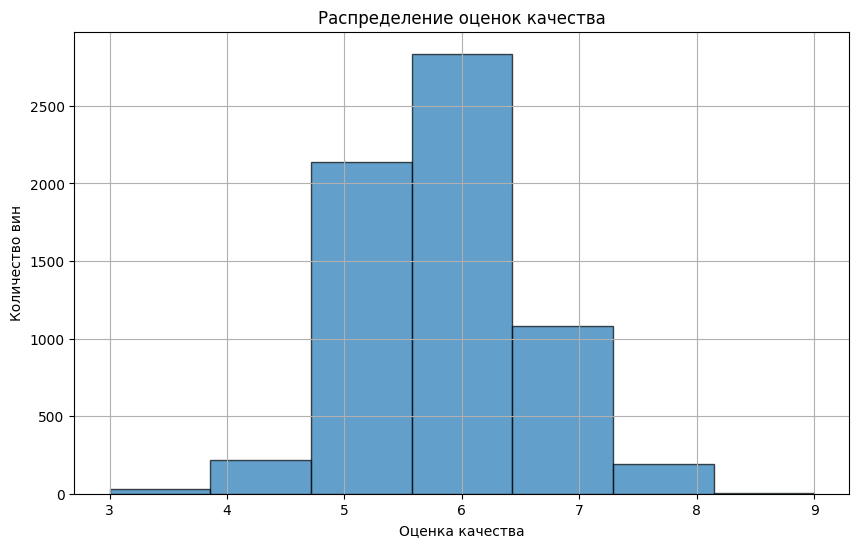

In [9]:
# Гистограмма распределения качества
plt.figure(figsize=(10, 6))
plt.hist(df['quality'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Распределение оценок качества')
plt.xlabel('Оценка качества')
plt.ylabel('Количество вин')
plt.grid(True)
plt.show()

In [10]:
# "Частые" — высокое качество (>6), "редкие" — низкое (<5)
high_quality = df[df['quality'] > 6]
low_quality = df[df['quality'] < 5]

print(high_quality.shape)  # Кол-во высококачественных
print(low_quality.shape)   # Кол-во низкокачественных

(1277, 13)
(246, 13)


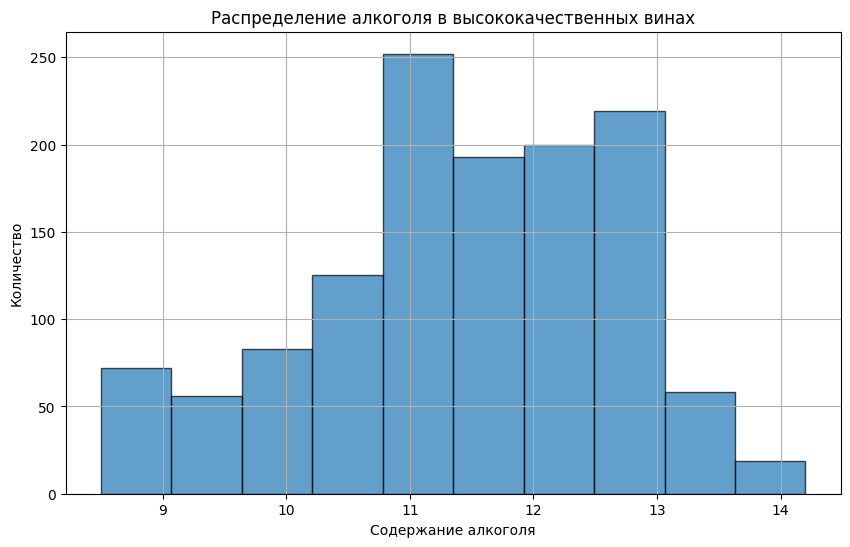

In [11]:
# Гистограмма для высококачественных (аналогично frequent_users_min)
plt.figure(figsize=(10, 6))
plt.hist(high_quality['alcohol'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Распределение алкоголя в высококачественных винах')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

In [12]:
print(high_quality['alcohol'].sum())  # Сумма, но лучше среднее
print(high_quality['alcohol'].mean())  # Средний алкоголь в high quality ~11.5

14600.4
11.433359436178543


In [13]:
# "Частые" по качеству >5 (аналогично >19)
common_quality = df[df['quality'] > 5]
print(common_quality.shape)  # ~4920
print(common_quality['alcohol'].sum())  # Сумма алкоголя

(4113, 13)
44626.699999976
